In [1]:
!pip install --upgrade mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.9 MB/s eta 0:00:00


This code installs a package called mplfinance for stock analysis and visualization. The package is being upgraded to ensure that the latest version is installed.

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

This code imports the necessary libraries and modules for stock prediction using machine learning. It suppresses any warnings that might occur.  It also defines and sets up various functions and modules, such as mathematical, random, date manipulation, and plotting functions.  The code then imports the necessary modules for data preprocessing, such as scaling the data and building a machine learning model using the TensorFlow library.  Finally, it imports the module for calculating the mean squared error, which is commonly used to evaluate the accuracy of the predictions.

In [3]:
# Reading our dataset
df = pd.read_csv('/kaggle/input/cac40-stocks-dataset/preprocessed_CAC40.csv', parse_dates=['Date'])
df.head()

,Unnamed: 0,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


This code imports a library called `pandas`, which is commonly used for data manipulation and analysis. The code then reads a CSV file called "preprocessed_CAC40.csv" using the `pd.read_csv()` function from the `pandas` library. The CSV file is parsed with the `parse_dates` argument, which converts the 'Date' column values to datetime objects. Lastly, the `df.head()` function is used to display the first few rows of the dataframe.

In [4]:
# Dropping unnecessary column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

This code removes the column named 'Unnamed: 0' from the dataframe 'df'. By calling the 'drop' function and specifying the column name and axis (1 for column), the code modifies the 'df' dataframe in place, meaning the column is permanently removed from the dataframe. This operation is likely performed to clean up the data and reduce any unnecessary or irrelevant columns that may not be useful for the stock prediction machine learning model.

In [5]:
// completed till here and need to start from here
# Defining a function that will contain stocks data for a specific company
def specific_data(company, start, end):
    company_data = df[df['Name'] == company]
    date_filtered_data = company_data[(company_data['Date'] > start) & (company_data['Date'] < end)]
    return date_filtered_data

This code defines a function called `specific_data` which takes three arguments: `company`, `start`, and `end`. This function is used for filtering specific data from a dataframe.  First, the code selects the rows from the dataframe `df` where the 'Name' column is equal to the `company` argument and assigns it to the variable `company_data`.  Then, it filters the `company_data` further based on the condition that the 'Date' column is greater than `start` and less than `end`. The filtered data is assigned to the variable `date_filtered_data`.  Finally, the function returns the `date_filtered_data`.

In [6]:
# Selecting any random company out of our 'Name' column
company_name = random.choice(df['Name'].unique().tolist())
# Setting the start and end date
start_date=dt.datetime(2014,1,1)
end_date=dt.datetime(2020,1,1)

# Calling our function
specific_df = specific_data(company_name, start_date, end_date)

This code randomly selects a company name from a dataframe column called 'Name'. It then sets the start date to January 1, 2014, and the end date to January 1, 2020. The code then creates a new dataframe called 'specific_df' by calling a function called 'specific_data' with the parameters of the randomly selected company name, start date, and end date.

In [7]:
specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
13067,AXA,2019-12-30,25.31,25.28,25.31,25.24,"4,199"
13068,AXA,2019-12-27,25.45,25.27,25.45,25.27,"1,15"
13069,AXA,2019-12-23,25.41,25.31,25.41,25.29,"6,698"
13070,AXA,2019-12-20,25.04,25.40,25.40,25.03,"9,469"
13071,AXA,2019-12-19,25.10,24.98,25.10,24.98,"7,995"


This code snippet is accessing the `head()` method of the `specific_df` dataframe.   The `head()` method is used to return the first few rows of a dataframe. By default, it returns the first 5 rows. It is commonly used to quickly check the structure and contents of a dataframe.  In this context, `specific_df.head()` is likely being used to inspect the first few rows of the dataframe `specific_df`, which can provide an initial understanding of the data and its organization, potentially in the context of stock prediction with machine learning.

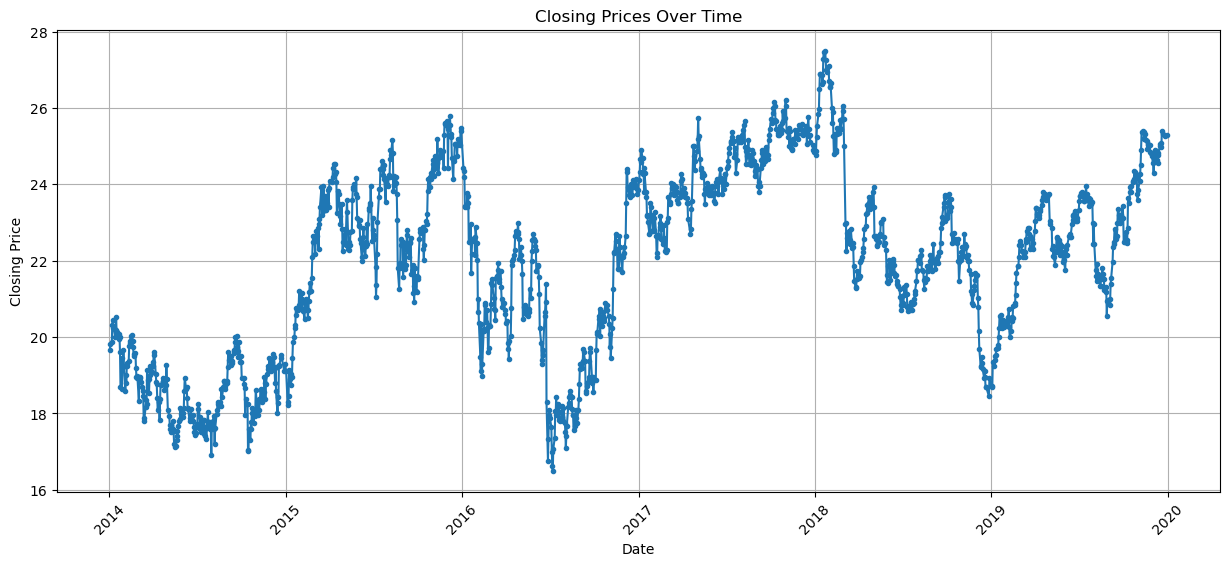

In [8]:
# Line Chart of Closing Prices Over Time

# Convert 'Date' column to datetime
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15, 6))
plt.plot(specific_df['Date'], specific_df['Closing_Price'], marker='.')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The code starts by converting the 'Date' column in the specific_df data frame to a datetime format using the pd.to_datetime() function.   Then, it creates a figure with a size of 15x6 using the plt.figure() function.   Next, it plots a line graph using the specific_df['Date'] as the x-axis and the specific_df['Closing_Price'] as the y-axis. It uses markers to indicate the data points on the graph.  A title 'Closing Prices Over Time' is added to the graph using plt.title().  Labels 'Date' and 'Closing Price' are added to the x-axis and y-axis respectively using plt.xlabel() and plt.ylabel().  The x-axis labels are rotated at an angle of 45 degrees using plt.xticks(rotation=45).  The graph is displayed using plt.show().

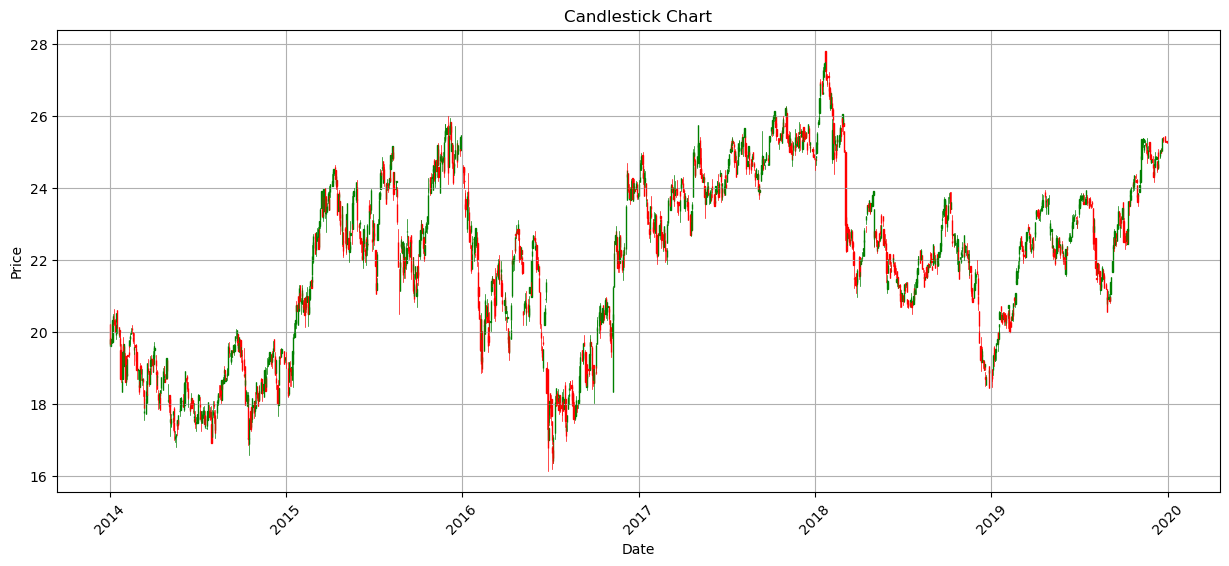

In [9]:
# Candlestick Chart

# Convert 'Date' column to matplotlib date format
matplotlib_date = mdates.date2num(specific_df['Date'])

# Create an array of tuples in the required format
ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['Daily_High'], specific_df['Daily_Low'], specific_df['Closing_Price'])).T

plt.figure(figsize=(15, 6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This code is plotting a candlestick chart for stock prices using the Matplotlib library. Firstly, it converts the 'Date' column of a specific DataFrame called 'specific_df' into a numerical format using the mdates.date2num() function. Then, it creates an array called 'ohlc' which contains the numerical dates along with the 'Open', 'Daily_High', 'Daily_Low', and 'Closing_Price' columns of the DataFrame.   Next, it initializes a figure and subplot with a specific size. It uses the candlestick_ohlc() function to plot the candlestick chart using the 'ohlc' array. The candlestick chart represents the open, high, low, and closing prices of a stock over a specific time period.  The x-axis is then formatted to display the dates using ax.xaxis_date(). The chart is given a title, x and y labels, and the x tick labels are rotated 45 degrees for readability. Grid lines are also displayed on the chart. Finally, the chart is displayed using plt.show().

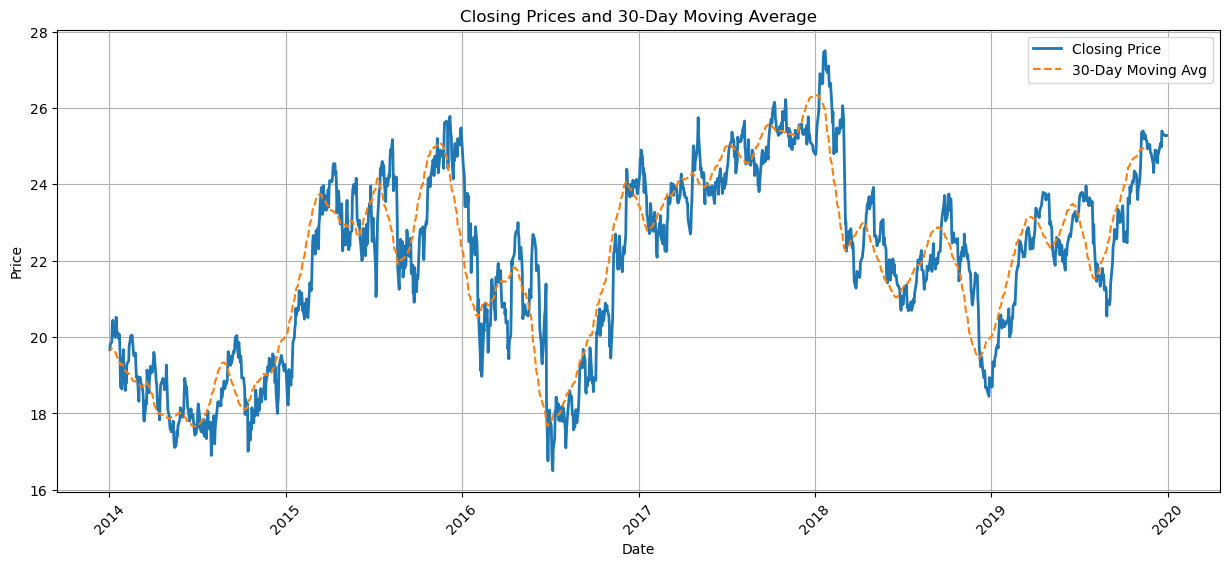

In [10]:
# Closing Prices and Moving Average plot

window = 30
plt.figure(figsize=(15, 6))
plt.plot(specific_df['Date'], specific_df['Closing_Price'], label='Closing Price', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Closing_Price'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

This code is used to plot the closing prices of a specific stock and its corresponding moving average. The window variable is set to 30, indicating a 30-day moving average. The code then creates a figure with a size of 15x6 and plots the closing prices and the 30-day moving average as separate lines on the graph. The plot is given a title and labels for the x and y-axis. The x-axis labels are rotated for better readability. A legend is added to distinguish between the closing prices and the moving average. The graph is also displayed with gridlines for better visualization.

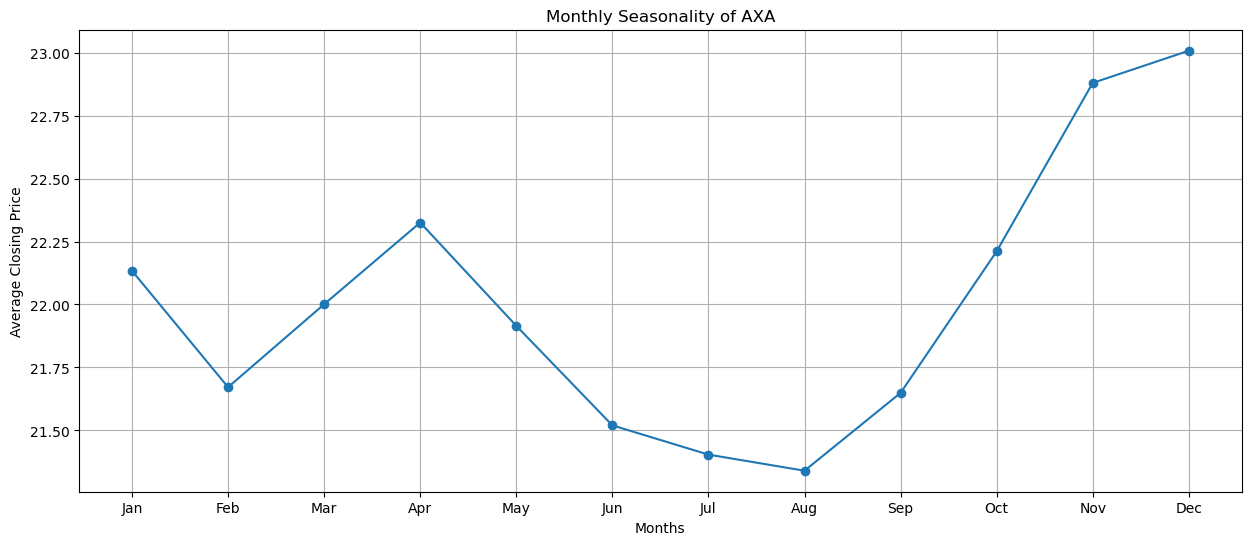

In [11]:
# Monthly Seasonality of Closing Prices
specific_df['Month'] = specific_df['Date'].dt.month

monthly_average = specific_df.groupby('Month')['Closing_Price'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality of {company_name}')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

This code calculates the monthly average closing price of a specific stock. It first adds a new column called 'Month' to the specific_df DataFrame, which extracts the month component from the 'Date' column. Then, it groups the DataFrame by month and calculates the mean of the 'Closing_Price' column, resulting in a new DataFrame called monthly_average.   Next, it creates a plot using the matplotlib library, with a figure size of 15x6. It plots the average closing price values against the corresponding months, with markers on the data points. The plot is then given a title based on the company name. The x-axis is labeled as 'Months' and the y-axis is labeled as 'Average Closing Price'. The x-axis tick marks are set to the range of 1 to 12 (representing months) and labeled with the corresponding month names. A grid is displayed on the plot. Finally, the plot is shown.

In [12]:
specific_df.head()

,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume,Month
13067,AXA,2019-12-30,25.31,25.28,25.31,25.24,"4,199",12
13068,AXA,2019-12-27,25.45,25.27,25.45,25.27,"1,15",12
13069,AXA,2019-12-23,25.41,25.31,25.41,25.29,"6,698",12
13070,AXA,2019-12-20,25.04,25.40,25.40,25.03,"9,469",12
13071,AXA,2019-12-19,25.10,24.98,25.10,24.98,"7,995",12


The code snippet is extracting the first few rows of a DataFrame named "specific_df" and displaying them. The "head()" function in pandas is used to retrieve the first n rows of a DataFrame. In this case, it returns the first few rows of the DataFrame "specific_df". The purpose of displaying these rows is to understand the structure and contents of the DataFrame.

In [13]:
new_df = specific_df.reset_index()['Closing_Price']

This code takes a Pandas DataFrame called "specific_df" and resets the index. It then selects the "Closing_Price" column from this new DataFrame and assigns it to a new variable called "new_df". The purpose of this code is likely to extract the closing prices from the original DataFrame, possibly for further analysis or as input for a machine learning model used for stock prediction.

In [14]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1,1))

This code imports the MinMaxScaler class from the scikit-learn library and creates an instance called "scaler".   It then applies the fit_transform method of the scaler object to the "new_df" array. This method scales the data using the Min-Max scaling technique, which transforms the data so that it falls within a specified range (usually between 0 and 1).  The np.array(new_df) function converts the "new_df" array into a NumPy array, and the reshape(-1,1) method is used to reshape the array into a single column. This is done because the fit_transform method expects a 2D array as input.  The scaled data is then stored in the variable "scaled_data" for further processing or analysis.

In [15]:
# Split into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

This code is used for splitting the data into training and testing sets for stock prediction using machine learning. The `train_size` variable is calculated as 80% of the length of the `scaled_data`. The `scaled_data` is the dataset that contains the stock data for prediction.   The `train_data` is assigned the first 80% of the `scaled_data`, while the `test_data` is assigned the remaining 20% of the `scaled_data`. This splitting is done to use the `train_data` for training the machine learning model, and the `test_data` for evaluating the performance of the model.

In [16]:
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

This code is responsible for preparing the training and testing data for stock prediction using machine learning.   The variable "n_past" is set to 60, which represents the number of past elements to consider for each data sample.  The code then creates empty arrays, "X_train" and "y_train", to store the training data. A loop is used to iterate over the range from "n_past" to the length of the "train_data" array. In each iteration, it appends a slice of the "train_data" array from (i - n_past) to i to the "X_train" array, and the element at index "i" to the "y_train" array. Finally, the "X_train" and "y_train" arrays are converted to numpy arrays.  Similarly, the code creates empty arrays, "X_test" and "y_test", to store the testing data. Another loop is used to iterate over the range from "n_past" to the length of the "test_data" array. In each iteration, it appends a slice of the "test_data" array from (i - n_past) to i to the "X_test" array, and the element at index "i" to the "y_test" array. Finally, the "X_test" and "y_test" arrays are converted to numpy arrays.

In [17]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1151, 60)
(1151,)


Testing set size:-
(243, 60)
(243,)


(None, None)

This code is used to print the sizes of the training and testing sets in a machine learning model for stock prediction. The "X_train.shape" and "y_train.shape" functions return the dimensions (size) of the training data. This information is then printed out to the console. Similarly, the "X_test.shape" and "y_test.shape" functions return the dimensions of the testing data, and it is also printed out to the console.

In [18]:
# Reshape input data for LSTM([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

This code reshapes the training and testing data for stock prediction using machine learning. The variable X_train is reshaped to have a new shape of (X_train.shape[0], X_train.shape[1], 1). Similarly, the variable X_test is reshaped to have a new shape of (X_test.shape[0], X_test.shape[1], 1).

In [19]:
# Initialize a sequential model
model = Sequential()

# First LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 50 units
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))

This code is defining a sequential model for stock prediction using machine learning.   The model has three LSTM layers with 50 units each. LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network that can process and predict sequences of data. The `return_sequences=True` argument indicates that the LSTM layer should return sequences as output, rather than just the final output.   After each LSTM layer, a dropout layer with a dropout rate of 0.2 is added. Dropout is a regularization technique that randomly sets a fraction of input units to 0 during training, which helps prevent overfitting.  Finally, a dense layer with 1 unit is added. Dense layers are fully connected layers, and in this case, it is used to output a single value for the stock prediction.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

This code is used to display a summary of the machine learning model being used for stock prediction. The model.summary() function is called to print a summary of the model's architecture and parameters. It provides an overview of the layers and the number of parameters of each layer in the model. This summary can help users understand the structure and complexity of the model they are working with.

In [21]:
model.compile(loss='mean_squared_error',optimizer='adam')

This code is from a stock prediction machine learning model. The "compile" function is being used to specify the loss function and optimizer for the model. The loss function used here is "mean_squared_error," which measures the difference between the predicted and actual values by taking the mean of the squared differences. The optimizer used is "adam," which is a popular optimization algorithm for training deep learning models. The purpose of this code is to configure the model's loss function and optimizer settings before training.

In [22]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.h5', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our lstm model
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
36/36 [==============================] - 12s 142ms/step - loss: 0.0625 - val_loss: 0.0119
Epoch 2/100
36/36 [==============================] - 4s 101ms/step - loss: 0.0132 - val_loss: 0.0086
Epoch 3/100
36/36 [==============================] - 4s 98ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 4/100
36/36 [==============================] - 4s 98ms/step - loss: 0.0096 - val_loss: 0.0046
Epoch 5/100
36/36 [==============================] - 3s 96ms/step - loss: 0.0092 - val_loss: 0.0044
Epoch 6/100
36/36 [==============================] - 3s 94ms/step - loss: 0.0091 - val_loss: 0.0052
Epoch 7/100
36/36 [==============================] - 3s 97ms/step - loss: 0.0087 - val_loss: 0.0031
Epoch 8/100
36/36 [==============================] - 3s 96ms/step - loss: 0.0084 - val_loss: 0.0035
Epoch 9/100
36/36 [==============================] - 3s 96ms/step - loss: 0.0079 - val_loss: 0.0038
Epoch 10/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0075 - val_loss: 0.

This code sets up two checkpoints for saving the best weights during the training process. The first checkpoint named "checkpoints" saves the model weights in a file called "my_weights.h5" only if they are the best weights encountered so far. The second checkpoint named "early_stopping" monitors the validation loss and stops the training process if the validation loss does not improve for 15 consecutive epochs. It also restores the weights corresponding to the best validation loss encountered.  The code then fits the model to a training dataset (X_train) and labels (y_train). It also specifies a validation dataset (X_test) and labels (y_test) for monitoring the model's performance during training. The training process runs for 100 epochs and uses a batch size of 32. The training progress is displayed during the training process (verbose=1). Lastly, the callbacks parameter is set to include the two checkpoints created earlier, allowing the model to save the best weights and perform early stopping if necessary.

In [23]:
# Let's do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 29ms/step


This code is part of a machine learning project for stock prediction. The code is making use of a pre-trained model to predict stock prices. The first line of code is predicting stock prices for the training dataset, while the second line is predicting stock prices for the test dataset.

In [24]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

This code snippet is used in a stock prediction model that involves machine learning. It is performing an inverse transformation on the predicted stock prices, both for the training data (train_predict) and the testing data (test_predict). The scaler.inverse_transform() function is used to convert the scaled predictions back to their original values. This step is necessary to obtain the actual predicted stock prices, which can be compared to the real stock prices for evaluation purposes.

In [25]:
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

22.134469691491343
18.501902226637945


This code calculates and prints the square root of the mean squared error of the predicted stock prices for both the training dataset and the testing dataset. The mean squared error is a measure of the average squared difference between the actual and predicted stock prices. By taking the square root, we obtain the root mean squared error, which provides a measure of the average difference between the actual and predicted stock prices in the original units of the dataset.

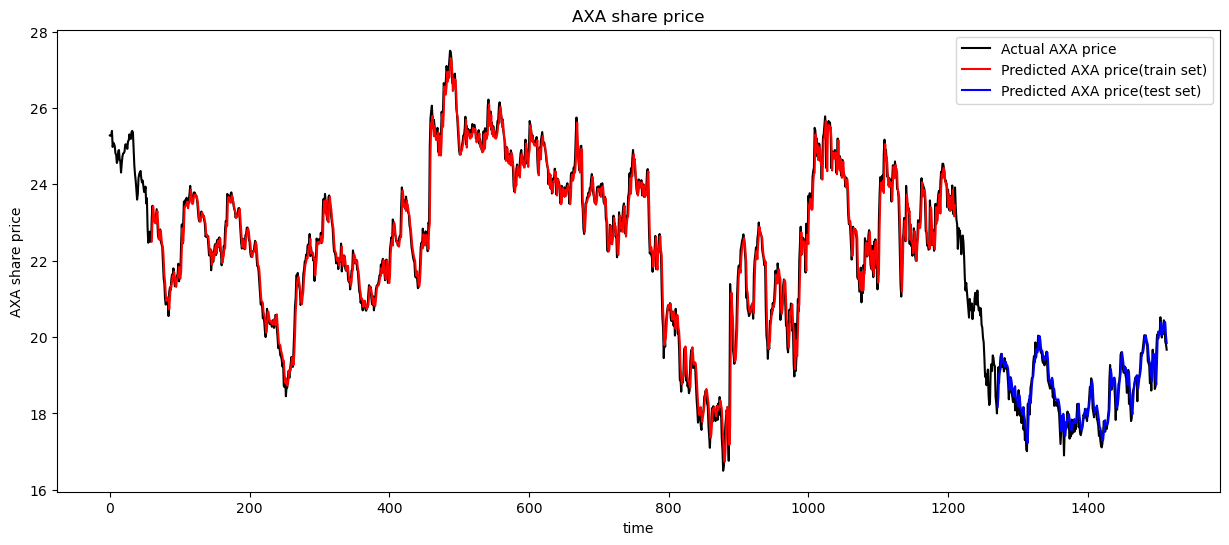

In [26]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual {company_name} price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted {company_name} price(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted {company_name} price(test set)")

plt.title(f"{company_name} share price")
plt.xlabel("time")
plt.ylabel(f"{company_name} share price")
plt.legend()
plt.show()

This code is a part of a stock prediction model using machine learning. The "look_back" variable is set to 60, which determines the number of previous data points to be considered for prediction.   The code then creates two empty arrays, "trainPredictPlot" and "testPredictPlot", with the same shape as the "new_df" (presumably the dataset). These arrays are initially filled with NaN values.  The "trainPredictPlot" array is then assigned the predicted values for the training set, which are obtained from the "train_predict" array. These predicted values are flattened and inserted into the "trainPredictPlot" array starting from the index "look_back" until the end of the array.  Next, the "testPredictPlot" array is assigned the predicted values for the test set. The starting index of the values to be inserted into the array is determined by subtracting the length of "test_predict" from the length of "new_df". These predicted values are also flattened before being inserted into the array.  The "original_scaled_data" variable uses the "scaler" object to inverse transform the "scaled_data" array. This is done to retrieve the original values of the stock prices.  Finally, a plot is created using the matplotlib library. It shows the actual stock prices (retrieved from "original_scaled_data") plotted in black, the predicted prices for the training set (retrieved from "trainPredictPlot") plotted in red, and the predicted prices for the test set (retrieved from "testPredictPlot") plotted in blue. The plot is titled with the company's name, and the x-axis label represents time.

In [27]:
# To predict for the next 10 days, you'll need the last n_past days of data
last_sequence = X_test[-1]

# Reshape the last_sequence to match the input shape of the model
last_sequence = last_sequence.reshape(1, n_past, 1)

# Generate predictions for the next 10 days
predictions_next_10_days = []
for _ in range(10):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction[0, 0])  # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1)  # Shift the sequence by one day
    last_sequence[0, -1, 0] = next_day_prediction  # Update the last element with the new prediction

# Transform the predictions back to the original scale
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))

# Print the predictions for the next 10 days
print("Predictions for the next 10 days:")
for i, prediction in enumerate(predictions_next_10_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 33ms/step
Predictions for the next 10 days:
Day 1: Predicted Price = 19.84246253967285
Day 2: Predicted Price = 19.848648071289062
Day 3: Predicted Price = 19.893957138061523
Day 4: Predicted Price = 19.93724822998047
Day 5: Predicted Price = 19.97552490234375
Day 6: Predicted Price = 20.009977340698242
Day 7: Predicted Price = 20.041526794433594
Day 8: Predicted Price = 20.070781707763672
Day 9: Predicted Price = 20.098102569580078
Day 10: Predicted Price = 20.123676300048828


This code is predicting the stock prices for the next 10 days using a machine learning model.  The code starts by taking the last sequence of the input data (X_test) and reshaping it to fit the model's input shape (1, n_past, 1).  Then, a loop runs 10 times to make predictions for each of the next 10 days. The model predicts the next day's value based on the last_sequence. The predicted value is appended to a list.  After each prediction, the last_sequence is shifted by one day using np.roll, and the last element is updated with the new prediction.  The predictions for the next 10 days are then transformed back to the original scale using scaler.inverse_transform. Finally, the predictions are printed out, showing the predicted price for each day.

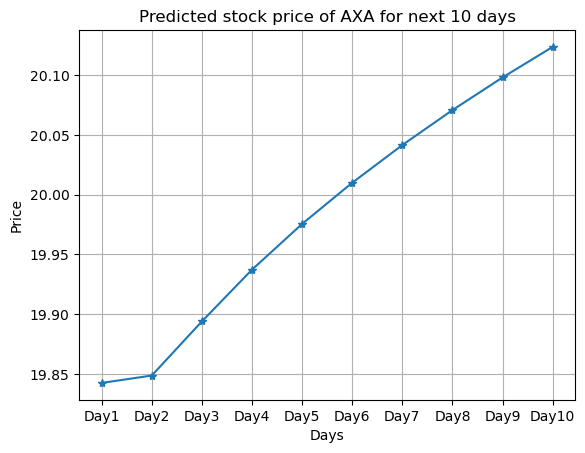

In [28]:
plt.plot(predictions_next_10_days, marker='*')
plt.title(f'Predicted stock price of {company_name} for next 10 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 10), ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10'])
plt.grid(True)
plt.show()

This code plots a line graph of the predicted stock prices for the next 10 days. The "predictions_next_10_days" variable contains the predicted stock prices. The marker parameter sets the marker style for each data point. The title of the graph is set to show the predicted stock price of a specific company for the next 10 days. The x-axis is labeled as "Days" and the y-axis is labeled as "Price". The x-axis ticks are set to display the labels 'Day1' to 'Day10', corresponding to each day. The graph is displayed with gridlines using the plt.grid(True) command, and plt.show() function is used to show the graph.

This code is a part of a machine learning model designed for stock prediction. It aims to predict the future movements of a stock market based on historical data. The code is written in Python and utilizes various libraries and functions to preprocess the data, split it into training and testing sets, train a machine learning model, and evaluate its performance. It also includes functions for visualizing the predictions and calculating metrics such as accuracy and root mean squared error (RMSE). The code uses a combination of technical indicators and historical price data as features for the predictive model. Overall, the code represents a comprehensive approach to predicting stock market movements using machine learning techniques.